In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

Using gradient descent

In [30]:
class GDLinearRegression:
    def __init__(self, learning_rate, loops = 1000):
        self.lr = learning_rate
        self.loops = loops
    def fit(self, x, y):
        dimension = x.shape[1]
        n = len(x)

        X = x.reshape(-1, dimension)
        Y = y.reshape(-1, 1)

        one = np.ones([n, 1])
        X = np.concatenate([one, X], 1) 

        self.w = np.zeros([dimension+1, 1])
        self.loss = []

        for i in range(self.loops):
            l = np.sum((Y - X.dot(self.w))**2)
            delta = X.T.dot((np.dot(X, self.w)-Y))

            self.w = self.w - delta * self.lr
            self.loss.append(l)
        return self.loss
    def predict(self, x):
        n = x.shape[0]
        one = np.ones([n, 1])
        x = np.concatenate([one, x], 1)
        return x.dot(self.w)
    def weight(self):
        return self.w
    def get_loss(self):
        return self.loss[-1]

test by theory

In [31]:
# Dữ liệu giả theo phương trình y = 4 + 3x + noise
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100)
m, n = X.shape
# Huấn luyện mô hình
model = GDLinearRegression(learning_rate=0.001, loops=1000)
model.fit(X, y)

print("Tham số học được:", model.w)
w  = model.w
# Dự đoán thử
print("Dự đoán cho x=5:", model.predict(np.array([[5]])))


Tham số học được: [[4.222151  ]
 [2.96846758]]
Dự đoán cho x=5: [[19.06448891]]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28452\3843816312.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


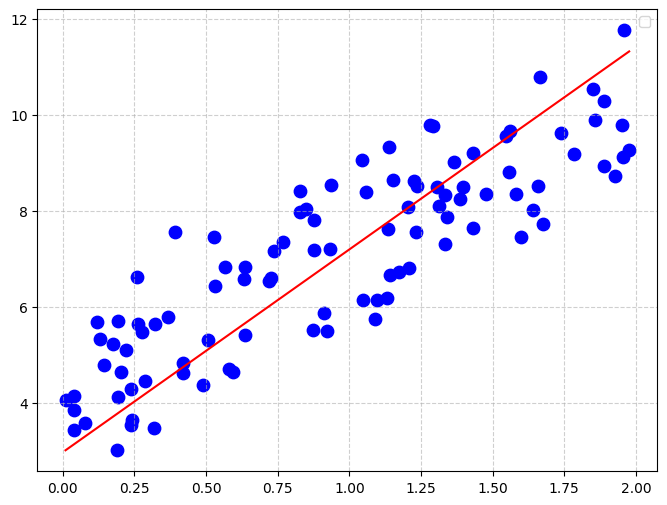

In [27]:
plt.figure(figsize = (8,6))
plt.scatter(X.flatten(), y, color = 'blue', s = 80)

x_line = np.linspace(X.min(), X.max(),100)
y_line = w[0] + w[1]*x_line
plt.plot(x_line, y_line, color = 'red')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [28]:
m, n = X.shape
X= np.c_[np.ones((m, 1)), X]

In [29]:
w = np.dot(X.T, X)
new_w = np.linalg.inv(w) 
a = np.dot(X.T, y)
re = np.dot(new_w, a)
re

array([4.22215108, 2.96846751])